In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [27]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca, filter_data_labels
from src.concept_vectors import *
from src.util import *
import seaborn as sns
from src.dataset import * 
from scipy.spatial.distance import cosine 
from scipy.stats.stats import pearsonr   

In [21]:
analyzed_attributes = ["{}_color".format(i) for i in range(4)]
analyzed_attributes += ["{}_number".format(i) for i in range(4)]
analyzed_attributes += ["spurious"]

In [22]:
all_mnist_attributes = get_mnist_attributes()

## Retrieve TCAV Concept Vectors

In [5]:
concept_vectors_tcav = []
concept_metadata_tcav = []

In [6]:
bottlenecks = ["mixed4c"]
experiments_per_concept = 10

In [7]:
for attribute in analyzed_attributes:
    tcav_vectors, tcav_metadata = load_tcav_vectors(attribute,bottlenecks)
    assert len(tcav_metadata) == experiments_per_concept
    concept_vectors_tcav+=list(tcav_vectors)
    concept_metadata_tcav+=tcav_metadata
concept_vectors_tcav = np.array(concept_vectors_tcav)

In [8]:
label_by_concept_tcav = [i['concept'] for i in concept_metadata_tcav]

## Retrieve CBM Concept Vectors (from labels)

In [9]:
concept_vectors_cbm = []
concept_metadata_cbm = []

In [10]:
for attribute in analyzed_attributes: 
    cbm_vector = create_vector_from_label_mnist(attribute)
    concept_vectors_cbm += list(cbm_vector)
    concept_metadata_cbm+=[{'concept': attribute}]
concept_vectors_cbm = np.array(concept_vectors_cbm)

In [11]:
label_by_concept_cbm = [i['concept'] for i in concept_metadata_cbm]

## Retrieve CEM Vectors

In [18]:
concept_vectors_cem = []
concept_metadata_cem = []

In [ ]:
for attribute in analyzed_attributes: 
    cem_vectors = list(load_cem_vectors("mnist",all_mnist_attributes.index(attribute)))
    concept_vectors_cem+=cem_vectors
    concept_metadata_cem+=[{'concept': attribute} for j in range(len(cem_vectors))]
concept_vectors_cem = np.array(concept_vectors_cem)

In [ ]:
label_by_concept_cem = [i['concept'] for i in concept_metadata_cem]

## Plot all Data

### Dimensionality Reduced Plots 

Text(27.0, 0.5, 'Axis 2')

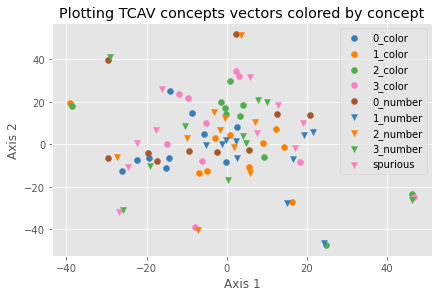

In [12]:
plt.title("Plotting TCAV concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_tcav,label_by_concept_tcav)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

Text(27.0, 0.5, 'Axis 2')

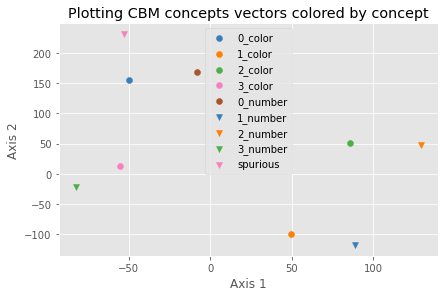

In [13]:
plt.title("Plotting CBM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cbm,label_by_concept_cbm)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

In [ ]:
plt.title("Plotting CEM concepts vectors colored by concept")
plt.tight_layout()
plot_tsne(concept_vectors_cem,label_by_concept_cem)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

### Heatmap

In [34]:
cosine_metric = cosine
pearson_metric = lambda a,b: 1-abs(pearsonr(a,b)[0])

Text(0.5, 1.0, 'Heatmap of average pearson distances between TCAV vectors for MNIST attributes, in Latent space')

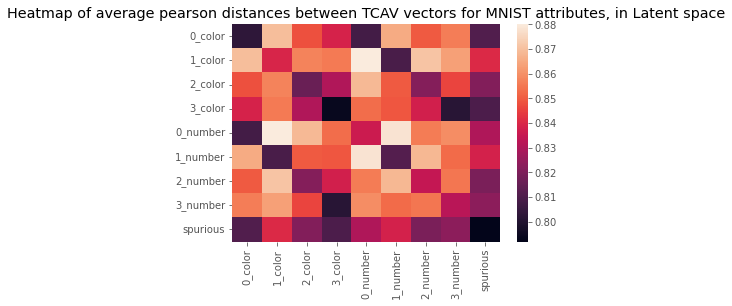

In [35]:
distance_by_class_raw = find_average_distances(concept_vectors_tcav,encode_list(label_by_concept_tcav),metric=pearson_metric)
sns.heatmap(distance_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_tcav),
            yticklabels=find_unique_in_order(label_by_concept_tcav))
plt.title("Heatmap of average pearson distances between TCAV vectors for MNIST attributes, in Latent space")

Text(0.5, 1.0, 'Heatmap of average pearson distances between CBM vectors for MNIST attributes, in Latent space')

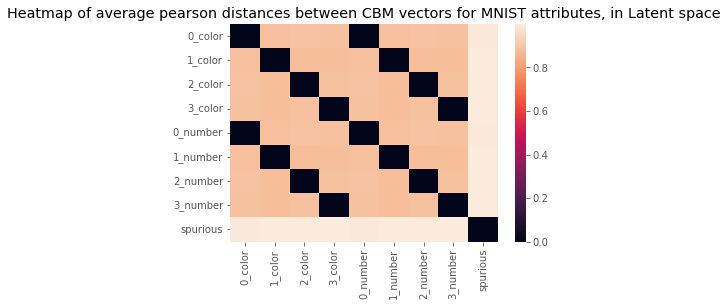

In [36]:
distance_by_class_raw = find_average_distances(concept_vectors_cbm,encode_list(label_by_concept_cbm),metric=pearson_metric)
sns.heatmap(distance_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cbm),
            yticklabels=find_unique_in_order(label_by_concept_cbm))
plt.title("Heatmap of average pearson distances between CBM vectors for MNIST attributes, in Latent space")

In [33]:
pearson_metric([0,0,1],[1,1,0])

2.0

In [ ]:
cosine_by_class_raw = find_average_distances(concept_vectors_cem,encode_list(label_by_concept_cem),metric=cosine_metric)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept_cem),
            yticklabels=find_unique_in_order(label_by_concept_cem))
plt.title("Heatmap of average cosine distances between CEM vectors for MNIST attributes, in Latent space")